In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.dropna(inplace=True)

In [8]:
df.shape,df.drop_duplicates().shape

((18285, 5), (18285, 5))

In [9]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer , HashingVectorizer

In [10]:
data = df.copy()

In [11]:
data.reset_index(inplace=True)

In [12]:
data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()
corpus = []

In [14]:
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]',' ',data['title'][i]).lower().split()
    review = [wn.lemmatize(word) for word in review if word not in stopwords.words('english')]
    corpus.append(' '.join(review))

In [24]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
x.shape

(18285, 5000)

In [26]:
y = data['label'] 

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [29]:
cv.get_feature_names()[:20]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest']

In [30]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [40]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [41]:
count_tf = pd.DataFrame(x_train,columns=cv.get_feature_names())
count_tf.head()

C:\Users\yogeswarvenkatsai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
def custom_cm(cm,classes=['real','fake'],normalize=False,title='Confusion matrix',):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.title(title,pad=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Real Labels')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.show()

In [45]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)
pred = model.predict(x_test)

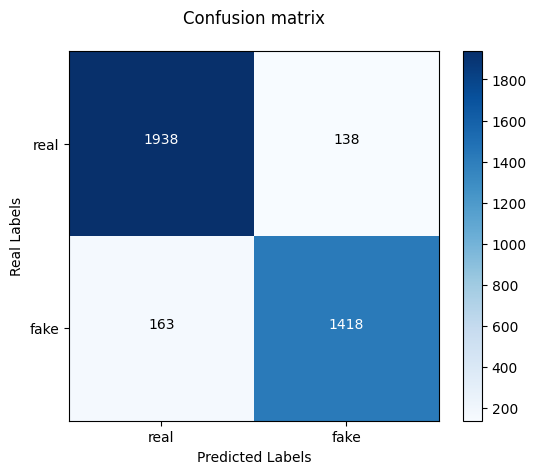

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm = confusion_matrix(pred,y_test)
custom_cm(cm)

In [68]:
report = classification_report(pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2047
           1       0.90      0.87      0.89      1610

    accuracy                           0.90      3657
   macro avg       0.90      0.90      0.90      3657
weighted avg       0.90      0.90      0.90      3657



In [69]:
accuracy_score(pred,y_test)*100

90.21055509980859

In [70]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier().fit(x_train,y_train)
pred = model.predict(x_test)

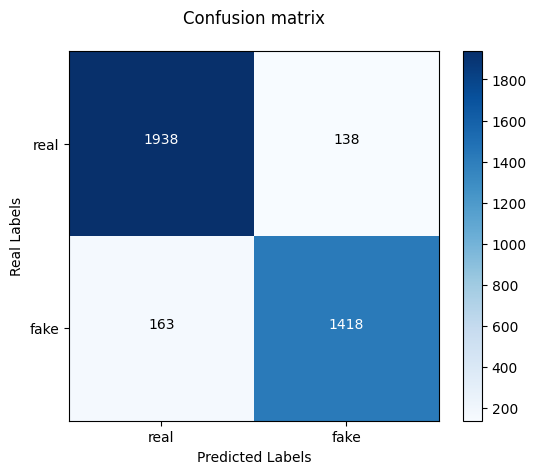

In [78]:
cm = confusion_matrix(pred,y_test)
custom_cm(cm)

In [79]:
report = classification_report(pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2076
           1       0.91      0.90      0.90      1581

    accuracy                           0.92      3657
   macro avg       0.92      0.92      0.92      3657
weighted avg       0.92      0.92      0.92      3657



In [81]:
accuracy_score(pred,y_test)*100

91.76920973475526

In [97]:
model.coef_[0]

array([ 0.28600241, -1.82575887, -1.79855715, ..., -0.19056344,
        0.25792018,  0.28987592])

In [85]:
features_names=cv.get_feature_names()

In [95]:
# Top 20 Fake words
sorted(zip(model.coef_[0],features_names))[:20]

[(-7.299738538379633, 'breitbart'),
 (-4.510331201384864, 'gorka'),
 (-4.062986405553541, 'cartel'),
 (-3.7147888297240317, 'spain'),
 (-3.707247356287662, 'hillary clinton'),
 (-3.6823487441647673, 'manchester'),
 (-3.661747910804034, 'delingpole'),
 (-3.560415760735187, 'virgil'),
 (-3.523010868902493, 'considers'),
 (-3.445048749054231, 'independent'),
 (-3.3946661197626082, 'twin'),
 (-3.289262245357435, 'check'),
 (-3.288595351880457, 'revelation'),
 (-3.2643211949610573, 'inaugural'),
 (-3.2460576359450197, 'warn'),
 (-3.2131996915185597, 'enforce'),
 (-3.2084338144661446, 'espn'),
 (-3.0444646560783064, 'madonna'),
 (-3.043843958231138, 'cher'),
 (-3.0252530970464537, 'authority')]

In [98]:
# Top 20 Real words
sorted(zip(model.coef_[0],features_names),reverse=True)[:20]

[(3.4609858888452476, 'fail'),
 (3.3709946454525004, 'music'),
 (3.322248162652995, 'bundy'),
 (3.2840559990188796, 'hardest'),
 (3.2796131473815056, 'try'),
 (3.1464687377014275, 'invisible'),
 (3.1260532555257217, 'hispanic'),
 (3.0628373461091747, 'bubble'),
 (3.0256749130865686, 'subject'),
 (2.974387325839568, 'suspends'),
 (2.92721698475891, 'power'),
 (2.7805684348821247, 'comment'),
 (2.718030045078477, 'divide'),
 (2.678691879976212, 'report new york'),
 (2.678691879976212, 'report new'),
 (2.673456828884521, 'hilarious'),
 (2.663756796673876, 'bill clinton'),
 (2.638725514714246, 'rock'),
 (2.573697391973549, 'hillary'),
 (2.5704940763840276, 'pastor')]